In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np

In [2]:
elevation = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Elevation_1.tif')
slope = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Slope_1.tif')
aspect = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Aspect_1.tif')
hillshade = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/Hillshade_1.tif')
streamdensity = rasterio.open('C:/Users/parke/DefaultFiles/Documents/ArcGIS/Projects/lamprey2/NHDStreamDensity.tif')
canopycover = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/CanopyCover.tif')
foresttype = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/ForestType.tif')
coniferforest = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/ConiferForest.tif')
mixedforest = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/MixedForest.tif')
hardwoodforest = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/HardwoodForest.tif')
watershed_boundary = gpd.read_file('C:/Users/parke/GISLampreyAnalysis/Data/WatershedBoundary.shp')
sample_sites = gpd.read_file('C:/Users/parke/GISLampreyAnalysis/Data/AllSamples.shp')
costfromcoast = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/NHDCostDist_2.tif')

In [3]:
elevation.statistics(1)

Statistics(min=0.0, max=9485.19921875, mean=734.39109518622, std=1275.0024509652)

In [4]:
elevation.shape

(48344, 23107)

In [8]:
samplearea = gpd.sjoin(sample_sites, watershed_boundary, how="inner", op="within")

C:\Users\parke\.lsdm\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [9]:
import os
import glob

path = 'C:/Users/parke/GISLampreyAnalysis/Data'

coord_list = [(x,y) for x,y in zip(samplearea['geometry'].x , samplearea['geometry'].y)]
for filename in glob.glob(os.path.join(path, 'Elevation_1.tif')):
    with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
        samplearea[str(filename.split('\\')[-1][:-4])] = [sample[0] for sample in f.sample(coord_list)]

In [10]:

def addraster(file):
    for filename in glob.glob(os.path.join(path, file)):
        with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
            samplearea[str(filename.split('\\')[-1][:-4])] = [sample[0] for sample in f.sample(coord_list)]

In [11]:
addraster('Aspect_1.tif')
addraster('Slope_1.tif')
addraster('Hillshade_1.tif')
addraster('NHDStreamDensity.tif')
addraster('CanopyCover.tif')
addraster('ForestType.tif')
addraster('ConiferForest.tif')
addraster('MixedForest.tif')
addraster('HardwoodForest.tif')
addraster('NHDCostDist_2.tif')
addraster('EtridentatusPredictionsShift.tif')
addraster('LayresiiPredictions_Shift.tif')

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
samplearea = samplearea[samplearea['Lampetra_p']!='ND']
samplearea = samplearea[samplearea['Pacific_La']!='ND']
samplearea

,SSNERR_Sit,Waterbody,Lake_or_st,Latitude,Longitude,Date_Colle,Year_Colle,USFS_Sampl,Lampetra_p,Pacific_La,Collector,Field_Note,Year_Col_1,USFS_Sam_1,Lampetra_1,Pacific__1,Field_No_1,geometry,index_right,TNMID,MetaSource,SourceData,SourceOrig,SourceFeat,LoadDate,GNIS_ID,AreaAcres,AreaSqKm,States,HUC6,Name,Shape_Leng,Shape_Area,Elevation_1,Aspect_1,Slope_1,Hillshade_1,NHDStreamDensity,CanopyCover,ForestType,ConiferForest,MixedForest,HardwoodForest,NHDCostDist_2,EtridentatusPredictionsShift,LayresiiPredictions_Shift
0,SSLS3003,Woodward Trib D,S,43.27950,-124.05080,2022-08-23,2022.0,OR_082322_WOOD_37,N,N,"WD, IM, MJ, RS","clear water, sample taken above culvert",0.0,NaN,NaN,NaN,NaN,POINT (367102.526 578022.413),1,{92CBA984-AFB1-4098-8966-7D513759AB0F},NaN,NaN,NaN,NaN,2020-06-04,0,8527604.28,34510.02,"CA,OR",171003,Southern Oregon Coastal,3.425716e+06,3.715310e+11,408.185577,265,4.537737,236,0.001092,7678,2,0,1,0,206345040.0,0.106667,0.023333
1,SSLS3004,Elk Creek SF,S,43.11500,-123.97350,2022-08-22,2022.0,OR_082222_ELLC_33,N,N,"WB, AH","clear water, sampled above new bridge",0.0,NaN,NaN,NaN,NaN,POINT (385148.902 517217.716),1,{92CBA984-AFB1-4098-8966-7D513759AB0F},NaN,NaN,NaN,NaN,2020-06-04,0,8527604.28,34510.02,"CA,OR",171003,Southern Oregon Coastal,3.425716e+06,3.715310e+11,149.997910,315,9.725875,233,0.001580,-1,1,1,0,0,158090464.0,0.276667,0.186667
2,SSLS3005,Unnamed creek Elk Creek trib,S,43.10720,-124.01630,2022-08-22,2022.0,OR_082222_UCEC_34,N,N,"WB, AH","clear water, sampled above culvert",0.0,NaN,NaN,NaN,NaN,POINT (373566.418 514898.682),1,{92CBA984-AFB1-4098-8966-7D513759AB0F},NaN,NaN,NaN,NaN,2020-06-04,0,8527604.28,34510.02,"CA,OR",171003,Southern Oregon Coastal,3.425716e+06,3.715310e+11,89.516487,104,17.043209,161,0.001576,-1,1,1,0,0,151103280.0,0.166667,0.160000
3,SSLS3006,Unnamed creek Elk Creek trib mile post 2.77,S,43.11740,-123.99310,2022-08-22,2022.0,OR_082222_UCEC_35,N,N,"WB, AH","Clear, trickle flow, sample collected above cu...",0.0,NaN,NaN,NaN,NaN,POINT (379957.373 518313.617),1,{92CBA984-AFB1-4098-8966-7D513759AB0F},NaN,NaN,NaN,NaN,2020-06-04,0,8527604.28,34510.02,"CA,OR",171003,Southern Oregon Coastal,3.425716e+06,3.715310e+11,135.923447,100,10.567454,191,0.001724,7703,2,0,1,0,155482864.0,0.163333,0.123333
4,SSLS3015,Elk Creek,S,43.57270,-123.93350,2022-08-12,2022.0,OR_081222_ELKC_30,N,N,RS,"sampled above falls and fishway, Coho present",0.0,NaN,NaN,NaN,NaN,POINT (402769.053 683434.256),1,{92CBA984-AFB1-4098-8966-7D513759AB0F},NaN,NaN,NaN,NaN,2020-06-04,0,8527604.28,34510.02,"CA,OR",171003,Southern Oregon Coastal,3.425716e+06,3.715310e+11,948.711731,261,1.325528,231,0.001015,6396,2,0,1,0,171833552.0,0.213333,0.023333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,SSLS2070,Lake Creek,S,44.15692,-123.57526,NaN,2021.0,OR_081421_LAKC_52,N,N,Peter and Zoli Baki,Lake Creek below falls,2021.0,OR_081421_LAKC_52,N,N,Lake Creek below falls,POINT (505628.183 892496.942),0,{DB7985D7-16DA-4BDA-BE5E-312FAE80FF6A},NaN,NaN,NaN,NaN,2020-06-14,0,3213999.70,13006.61,OR,171002,Northern Oregon Coastal,3.689339e+06,1.399775e+11,667.105530,1,43.168850,113,0.000860,-1,1,1,0,0,143432864.0,0.450000,0.136667
135,SSLS1091,Five Rivers,S,44.31913,-123.84635,NaN,2021.0,OR_081921_FIVR_09,Y,Y,Dean Yurica/Ruth Bell,NaN,2021.0,OR_081921_FIVR_09,Y,Y,NaN,POINT (436931.271 954301.772),0,{DB7985D7-16DA-4BDA-BE5E-312FAE80FF6A},NaN,NaN,NaN,NaN,2020-06-14,0,3213999.70,13006.61,OR,171002,Northern Oregon Coastal,3.689339e+06,1.399775e+11,158.419464,75,1.113196,226,0.001196,7004,3,0,0,1,96307928.0,0.963333,0.730000
136,SSLS1092,Canal Creek,S,44.36829,-123.92722,NaN,2021.0,OR_081921_CANC_10,Y,Y,Dean Yurica/Ruth Bell,NaN,2021.0,OR_081921_CANC_10,Y,Y,NaN,POINT (416561.186 973008.824),0,{DB7985D7-16DA-4BDA-BE5E-312FAE80FF6A},NaN,NaN,NaN,NaN,2020-06-14,0,3213999.70,13006.61,OR,171002,Northern Oregon Coastal,3.6893

In [14]:
samplearea.Lampetra_p.replace(('Y', 'N'), (1, 0), inplace=True)
samplearea.Pacific_La.replace(('Y', 'N'), (1, 0), inplace=True)

In [15]:
features = ['Elevation_1','Slope_1','Aspect_1','Hillshade_1','NHDStreamDensity','ConiferForest','MixedForest','HardwoodForest','CanopyCover','NHDCostDist_2']
corr_matrix = samplearea[['Lampetra_p','Pacific_La']+features].corr()
corr_matrix

,Lampetra_p,Pacific_La,Elevation_1,Slope_1,Aspect_1,Hillshade_1,NHDStreamDensity,ConiferForest,MixedForest,HardwoodForest,CanopyCover,NHDCostDist_2
Lampetra_p,1.000000,0.265974,-0.421709,-0.166222,-0.145360,0.097209,0.220717,0.101344,-0.195148,0.090009,-0.124656,-0.324574
Pacific_La,0.265974,1.000000,-0.267210,-0.128191,-0.003634,0.123723,0.046980,-0.007897,-0.131606,0.144851,-0.063188,-0.235027
Elevation_1,-0.421709,-0.267210,1.000000,0.159912,0.055135,-0.076822,-0.124990,-0.113307,0.223511,-0.106146,0.249486,0.783519
Slope_1,-0.166222,-0.128191,0.159912,1.000000,-0.232871,-0.928592,0.019123,0.118447,-0.070086,-0.058232,0.017884,0.101425
Aspect_1,-0.145360,-0.003634,0.055135,-0.232871,1.000000,0.366952,-0.184194,0.004240,-0.008187,0.003789,-0.014189,0.042586
Hillshade_1,0.097209,0.123723,-0.076822,-0.928592,0.366952,1.000000,-0.041560,-0.119308,0.078920,0.050045,-0.021446,-0.019788
NHDStreamDensity,0.220717,0.046980,-0.124990,0.019123,-0.184194,-0.041560,1.000000,0.079153,-0.151512,0.069365,0.031425,0.162546
ConiferForest,0.101344,-0.007897,-0.113307,0.118447,0.004240,-0.119308,0.079153,1.000000,-0.564153,-0.520135,-0.468410,0.012090
MixedForest,-0.195148,-0.131606,0.223511,-0.070086,-0.008187,0.078920,-0.151512,-0.564153,1.000000,-0.411756,0.487844,0.067598
HardwoodForest,0.090009,0.144851,-0.106146,-0.058232,0.003789,0.050045,0.069365,-0.520135,-0.411756,1.000000,0.012353,-0.083268


In [ ]:
samplearea.groupby('Lampetra_p')['Elevation_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Elevation (ft)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['Elevation_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Elevation (ft)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8);

samplearea.groupby('Lampetra_p')['NHDCostDist_2'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Cost Distance from Coast', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['NHDCostDist_2'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Cost Distance from Coast', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Lampetra_p')['Aspect_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Aspect', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['Aspect_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Aspect', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Lampetra_p')['NHDStreamDensity'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Stream Density (ft⁻²)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['NHDStreamDensity'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Stream Density (ft⁻²)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Lampetra_p')['Slope_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Slope', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['Slope_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Slope', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['Hillshade_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Hillshade', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Lampetra_p')['Hillshade_1'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Hillshade', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8);

samplearea.groupby('Pacific_La')['ForestType'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
#plt.xlabel('Forest Type', size= 'small');
plt.ylabel('Frequency', size= 'small');
plt.xticks([1,2,3], fontsize=8, labels=['Conifer','Mixed', 'Hardwood']);
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8);

samplearea.groupby('Lampetra_p')['ForestType'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xticks([1,2,3], fontsize=8, labels=['Conifer','Mixed', 'Hardwood']);
plt.yticks(fontsize=8)
#plt.xlabel('Forest Type', size= 'small');
plt.ylabel('Frequency', size= 'small')
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

samplearea.groupby('Pacific_La')['CanopyCover'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Canopy Cover (%)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks([0,2000,4000,6000,8000],fontsize=8, labels=['0','20', '40','60','80'])
plt.yticks(fontsize=8)
plt.legend(labels=['PL Not Present','PL Present'], fontsize=8)

samplearea.groupby('Lampetra_p')['CanopyCover'].plot.hist(legend=True, alpha=0.5, figsize=(4,4));
plt.xlabel('Canopy Cover (%)', size= 'small');plt.ylabel('Frequency', size= 'small')
plt.xticks([0,2000,4000,6000,8000],fontsize=8, labels=['0','20', '40','60','80'])
plt.yticks(fontsize=8)
plt.legend(labels=['WBL Not Present','WBL Present'], fontsize=8)

In [17]:
samplearea[samplearea['Lampetra_p'] == 1][features].describe()

,Elevation_1,Slope_1,Aspect_1,Hillshade_1,NHDStreamDensity,ConiferForest,MixedForest,HardwoodForest,CanopyCover,NHDCostDist_2
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01
mean,46.995586,4.606369,134.87500,216.575000,0.001130,0.462500,0.225000,0.312500,3346.262500,4.955402e+07
std,61.790192,4.768590,81.50396,18.358439,0.000318,0.501737,0.420217,0.466437,3012.966908,4.053667e+07
min,1.184812,0.023420,2.00000,129.000000,0.000350,0.000000,0.000000,0.000000,-1.000000,1.354346e+06
25%,14.693335,1.232404,78.00000,215.500000,0.000998,0.000000,0.000000,0.000000,-1.000000,2.559747e+07
50%,28.658695,2.909552,115.50000,223.000000,0.001120,0.000000,0.000000,0.000000,3633.000000,3.339294e+07
75%,44.612501,6.304312,167.50000,227.000000,0.001331,1.000000,0.000000,1.000000,6085.250000,6.277383e+07
max,438.157990,23.723553,347.00000,232.000000,0.001890,1.000000,1.000000,1.000000,8619.000000,2.096519e+08


In [18]:
samplearea[samplearea['Lampetra_p'] == 0][features].describe()

,Elevation_1,Slope_1,Aspect_1,Hillshade_1,NHDStreamDensity,ConiferForest,MixedForest,HardwoodForest,CanopyCover,NHDCostDist_2
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01
mean,395.325714,6.800071,160.521739,212.072464,0.000977,0.362319,0.405797,0.231884,4108.797101,1.086308e+08
std,548.787170,8.114870,94.253820,27.680594,0.000361,0.484192,0.494643,0.425127,3085.925953,1.193249e+08
min,3.217984,0.125761,1.000000,113.000000,0.000159,0.000000,0.000000,0.000000,-1.000000,1.004643e+05
25%,22.394026,1.313972,88.000000,205.000000,0.000732,0.000000,0.000000,0.000000,633.000000,1.692043e+07
50%,135.923447,4.234344,146.000000,225.000000,0.000948,0.000000,0.000000,0.000000,4764.000000,9.223422e+07
75%,576.090881,9.449681,217.000000,228.000000,0.001209,1.000000,1.000000,0.000000,6607.000000,1.580905e+08
max,2248.142334,43.168850,357.000000,237.000000,0.001759,1.000000,1.000000,1.000000,8919.000000,6.129316e+08


In [19]:
samplearea[samplearea['Pacific_La'] == 1][features].describe()

,Elevation_1,Slope_1,Aspect_1,Hillshade_1,NHDStreamDensity,ConiferForest,MixedForest,HardwoodForest,CanopyCover,NHDCostDist_2
count,92.000000,92.000000,92.000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,121.674881,4.958233,146.500,216.739130,0.001072,0.413043,0.260870,0.326087,3547.673913,6.012186e+07
std,235.319489,4.986164,94.252,19.067186,0.000355,0.495079,0.441515,0.471348,3040.589312,6.105320e+07
min,1.184812,0.023420,14.000,129.000000,0.000291,0.000000,0.000000,0.000000,-1.000000,1.004643e+05
25%,16.649017,1.268208,75.750,213.750000,0.000851,0.000000,0.000000,0.000000,-1.000000,2.295892e+07
50%,35.021469,3.171980,124.500,225.000000,0.001050,0.000000,0.000000,0.000000,3999.000000,3.493818e+07
75%,113.493153,6.974575,185.000,228.000000,0.001331,1.000000,1.000000,1.000000,6252.000000,8.193002e+07
max,1219.338989,23.723553,357.000,237.000000,0.001890,1.000000,1.000000,1.000000,8919.000000,2.513283e+08


In [20]:
samplearea[samplearea['Pacific_La'] == 0][features].describe()

,Elevation_1,Slope_1,Aspect_1,Hillshade_1,NHDStreamDensity,ConiferForest,MixedForest,HardwoodForest,CanopyCover,NHDCostDist_2
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01
mean,348.123352,6.693983,147.157895,210.859649,0.001038,0.421053,0.385965,0.192982,3944.245614,1.040112e+08
std,573.712341,8.539941,78.472650,28.403621,0.000333,0.498117,0.491150,0.398147,3103.609749,1.210319e+08
min,3.217984,0.125761,1.000000,113.000000,0.000159,0.000000,0.000000,0.000000,-1.000000,1.884262e+05
25%,17.139526,1.313972,100.000000,207.000000,0.000860,0.000000,0.000000,0.000000,292.000000,2.613803e+07
50%,68.625984,3.936610,142.000000,223.000000,0.001023,0.000000,0.000000,0.000000,4670.000000,6.262526e+07
75%,408.185577,8.067579,182.000000,228.000000,0.001188,1.000000,1.000000,0.000000,6396.000000,1.436983e+08
max,2248.142334,43.168850,347.000000,236.000000,0.001724,1.000000,1.000000,1.000000,8531.000000,6.129316e+08


In [21]:
L_p1 = samplearea[samplearea['Lampetra_p'] == 1][features]

In [22]:
L_p0 = samplearea[samplearea['Lampetra_p'] == 0][features]

In [23]:
P_L1 = samplearea[samplearea['Pacific_La'] == 1][features]

In [24]:
P_L0 = samplearea[samplearea['Pacific_La'] == 0][features]

In [25]:
from scipy import stats
stats.ttest_ind(L_p1['Elevation_1'],L_p0['Elevation_1'], equal_var = False)

Ttest_indResult(statistic=-5.243849291727372, pvalue=1.6144063798996836e-06)

In [26]:
for feature in features:
    print(f'T test for {feature}')
    print(stats.ttest_ind(L_p1[feature], L_p0[feature], equal_var = False))

T test for Elevation_1
Ttest_indResult(statistic=-5.243849291727372, pvalue=1.6144063798996836e-06)
T test for Slope_1
Ttest_indResult(statistic=-1.9711104770721006, pvalue=0.05130789477387575)
T test for Aspect_1
Ttest_indResult(statistic=-1.7623121940813435, pvalue=0.08027163174267063)
T test for Hillshade_1
Ttest_indResult(statistic=1.1504391752991825, pvalue=0.25234713418542576)
T test for NHDStreamDensity
Ttest_indResult(statistic=2.718049917260203, pvalue=0.0074175315959168955)
T test for ConiferForest
Ttest_indResult(statistic=1.2383662887779945, pvalue=0.21757962711183942)
T test for MixedForest
Ttest_indResult(statistic=-2.3836087933705468, pvalue=0.018543899682257652)
T test for HardwoodForest
Ttest_indResult(statistic=1.1033075035318411, pvalue=0.27170222764488644)
T test for CanopyCover
Ttest_indResult(statistic=-1.5205500669238745, pvalue=0.13058495932972863)
T test for NHDCostDist_2
Ttest_indResult(statistic=-3.92197915176226, pvalue=0.00018224447232184228)


In [27]:
for feature in features:
    print(f'T test for {feature}')
    print(stats.ttest_ind(P_L1[feature], P_L0[feature], equal_var = False))

T test for Elevation_1
Ttest_indResult(statistic=-2.8358406744310085, pvalue=0.00601907383625145)
T test for Slope_1
Ttest_indResult(statistic=-1.394313445427129, pvalue=0.16708528441654705)
T test for Aspect_1
Ttest_indResult(statistic=-0.045994991608545435, pvalue=0.9633823885436372)
T test for Hillshade_1
Ttest_indResult(statistic=1.381763756252187, pvalue=0.17056440560006722)
T test for NHDStreamDensity
Ttest_indResult(statistic=0.5790930994482654, pvalue=0.5635707485974625)
T test for ConiferForest
Ttest_indResult(statistic=-0.09561065563736172, pvalue=0.9239916240345356)
T test for MixedForest
Ttest_indResult(statistic=-1.5697204070285493, pvalue=0.11937180856146555)
T test for HardwoodForest
Ttest_indResult(statistic=1.8465452249503589, pvalue=0.06702718112260062)
T test for CanopyCover
Ttest_indResult(statistic=-0.7639379092764919, pvalue=0.44644270185363366)
T test for NHDCostDist_2
Ttest_indResult(statistic=-2.5445295883540817, pvalue=0.013029758537928938)


In [28]:
for feature in features:
    print(f'T test for {feature}')
    print(stats.ttest_ind(P_L1[feature], L_p1[feature], equal_var = False))

T test for Elevation_1
Ttest_indResult(statistic=2.929996131462737, pvalue=0.004157261021363998)
T test for Slope_1
Ttest_indResult(statistic=0.47253301193825936, pvalue=0.6371580378913375)
T test for Aspect_1
Ttest_indResult(statistic=0.8674520017302834, pvalue=0.38691722664776274)
T test for Hillshade_1
Ttest_indResult(statistic=0.057440899477438016, pvalue=0.9542621561839191)
T test for NHDStreamDensity
Ttest_indResult(statistic=-1.12858473335763, pvalue=0.26066462579318134)
T test for ConiferForest
Ttest_indResult(statistic=-0.6487856819846334, pvalue=0.5173731273925823)
T test for MixedForest
Ttest_indResult(statistic=0.5453504765635814, pvalue=0.5862332455156494)
T test for HardwoodForest
Ttest_indResult(statistic=0.18961660270644495, pvalue=0.8498396202559648)
T test for CanopyCover
Ttest_indResult(statistic=0.4354235887017188, pvalue=0.6638168745039299)
T test for NHDCostDist_2
Ttest_indResult(statistic=1.3524465604861169, pvalue=0.17814740849799904)


In [29]:
for feature in features:
    print(f'T test for {feature}')
    print(stats.ttest_ind(P_L0[feature], L_p0[feature], equal_var = False))

T test for Elevation_1
Ttest_indResult(statistic=-0.46877148176698485, pvalue=0.6401022061251933)
T test for Slope_1
Ttest_indResult(statistic=-0.07098067043895183, pvalue=0.9435342617717641)
T test for Aspect_1
Ttest_indResult(statistic=-0.8684693548883483, pvalue=0.38681535055635874)
T test for Hillshade_1
Ttest_indResult(statistic=-0.24131922511625184, pvalue=0.8097253124513107)
T test for NHDStreamDensity
Ttest_indResult(statistic=0.991426106026887, pvalue=0.323431981196486)
T test for ConiferForest
Ttest_indResult(statistic=0.667141244242228, pvalue=0.5059819824754259)
T test for MixedForest
Ttest_indResult(statistic=-0.22487210788668469, pvalue=0.822461690919944)
T test for HardwoodForest
Ttest_indResult(statistic=-0.5293643043308406, pvalue=0.597514508742898)
T test for CanopyCover
Ttest_indResult(statistic=-0.2969822720463098, pvalue=0.7669965244904142)
T test for NHDCostDist_2
Ttest_indResult(statistic=-0.21461160665833076, pvalue=0.8304377793110365)


In [48]:
import sklearn
from sklearn.preprocessing import StandardScaler
 
X = samplearea[features]
y = samplearea['Pacific_La']

In [49]:
scaler = StandardScaler()  
X_scaled = X #scaler.fit_transform(X)
samplearea_scaled = pd.DataFrame(X_scaled, columns=features)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(samplearea_scaled, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn import metrics

logpred = log_reg.predict(X_test)

score = log_reg.score(X_test, y_test)
print(score)

0.43333333333333335


In [53]:
logcm = metrics.confusion_matrix(y_test, logpred)
print(logcm)

[[13  0]
 [17  0]]


In [54]:
print(metrics.classification_report(y_test, logpred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        17

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30        30
weighted avg       0.19      0.43      0.26        30



C:\Users\parke\.lsdm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parke\.lsdm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\parke\.lsdm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier(random_state = 15)

tree_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [56]:
treepred = tree_class.predict(X_test)

treecm = metrics.confusion_matrix(y_test, treepred)
print(treecm)

[[ 7  6]
 [ 5 12]]


In [57]:
print(metrics.classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.67      0.71      0.69        17

    accuracy                           0.63        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30



In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators = 300, random_state = 20)

forest_class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=20)

In [59]:
forestpred = forest_class.predict(X_test)

forestcm = metrics.confusion_matrix(y_test, forestpred)
print(forestcm)

[[ 4  9]
 [ 3 14]]


In [60]:
print(metrics.classification_report(y_test, forestpred))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.61      0.82      0.70        17

    accuracy                           0.60        30
   macro avg       0.59      0.57      0.55        30
weighted avg       0.59      0.60      0.57        30



In [61]:
from sklearn.inspection import permutation_importance
result = permutation_importance(forest_class, X_test, y_test, n_repeats=300, random_state=20)
forest_importances = pd.Series(result.importances_mean, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

forest_importances

In [62]:
importances = forest_class.feature_importances_
importances

array([0.18521686, 0.14583099, 0.12188375, 0.09506873, 0.11381035,
       0.01832882, 0.02629355, 0.01360574, 0.12847883, 0.15148238])

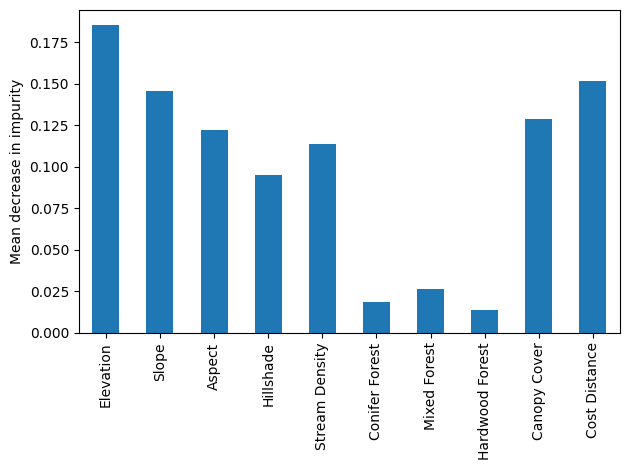

In [63]:
forest_importances1 = pd.Series(importances, index=features)
fig, ax = plt.subplots()
forest_importances1.plot.bar(ax=ax)
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(["Elevation", "Slope", "Aspect", "Hillshade", "Stream Density", "Conifer Forest", "Mixed Forest", "Hardwood Forest", "Canopy Cover", "Cost Distance"])
fig.tight_layout()

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

#Elevation plots

EleStDfeatures = ('Elevation_1', 'NHDStreamDensity', ('Elevation_1', 'NHDStreamDensity'))
EleAspfeatures = ('Elevation_1', 'Aspect_1', ('Elevation_1', 'Aspect_1'))
EleSlofeatures = ('Elevation_1', 'Slope_1', ('Elevation_1', 'Slope_1'))
EleHilfeatures = ('Elevation_1', 'Hillshade_1', ('Elevation_1', 'Hillshade_1'))
EleFoTfeatures = ('Elevation_1', 'ForestType_1', ('Elevation_1', 'ForestType_1'))
EleCanfeatures = ('Elevation_1', 'CanopyCover_1', ('Elevation_1', 'CanopyCover_1'))
#EleStOfeatures = ('Elevation_1', 'NHDStreamOrder', ('Elevation_1', 'NHDStreamOrder'))
EleCoDfeatures = ('Elevation_1', 'NHDCostDist_2', ('Elevation_1', 'NHDCostDist_2'))

fig, ax = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleStDfeatures, ax=ax);

fig, ax1 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleAspfeatures, ax=ax1);

fig, ax2 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleSlofeatures, ax=ax2);

fig, ax3 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleHilfeatures, ax=ax3);

fig, ax4 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleFoTfeatures, ax=ax4);

fig, ax5 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleCanfeatures, ax=ax5);

#fig, ax6 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, EleStOfeatures, ax=ax6);

fig, ax7 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, EleCoDfeatures, ax=ax7);

#Aspect plots

AspStDfeatures = ('Aspect_1', 'NHDStreamDensity', ('Aspect_1', 'NHDStreamDensity'))
AspSlofeatures = ('Aspect_1', 'Slope_1', ('Aspect_1', 'Slope_1'))
AspHilfeatures = ('Aspect_1', 'Hillshade_1', ('Aspect_1', 'Hillshade_1'))
AspFoTfeatures = ('Aspect_1', 'ForestType_1', ('Aspect_1', 'ForestType_1'))
AspCanfeatures = ('Aspect_1', 'CanopyCover_1', ('Aspect_1', 'CanopyCover_1'))
#AspStOfeatures = ('Aspect_1', 'NHDStreamOrder', ('Aspect_1', 'NHDStreamOrder'))
AspCoDfeatures = ('Aspect_1', 'NHDCostDist_2', ('Aspect_1', 'NHDCostDist_2'))

fig, ax8 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspStDfeatures, ax=ax8);

fig, ax9 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspSlofeatures, ax=ax9);

fig, ax10 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspHilfeatures, ax=ax10);

fig, ax11 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspFoTfeatures, ax=ax11);

fig, ax12 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspCanfeatures, ax=ax12);

#fig, ax13 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, AspStOfeatures, ax=ax13);

fig, ax14 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, AspCoDfeatures, ax=ax14);

#Stream density plots

StDSlofeatures = ('NHDStreamDensity', 'Slope_1', ('NHDStreamDensity', 'Slope_1'))
StDHilfeatures = ('NHDStreamDensity', 'Hillshade_1', ('NHDStreamDensity', 'Hillshade_1'))
StDFoTfeatures = ('NHDStreamDensity', 'ForestType_1', ('NHDStreamDensity', 'ForestType_1'))
StDCanfeatures = ('NHDStreamDensity', 'CanopyCover_1', ('NHDStreamDensity', 'CanopyCover_1'))
#StDStOfeatures = ('NHDStreamDensity', 'NHDStreamOrder', ('NHDStreamDensity', 'NHDStreamOrder'))
StDCoDfeatures = ('NHDStreamDensity', 'NHDCostDist_2', ('NHDStreamDensity', 'NHDCostDist_2'))

fig, ax15 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, StDSlofeatures, ax=ax15);

fig, ax16 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, StDHilfeatures, ax=ax16);

fig, ax17 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, StDFoTfeatures, ax=ax17);

fig, ax18 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, StDCanfeatures, ax=ax18);

#fig, ax19 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, StDStOfeatures, ax=ax19);

fig, ax20 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, StDCoDfeatures, ax=ax20);

#Slope plots

SloHilfeatures = ('Slope_1', 'Hillshade_1', ('Slope_1', 'Hillshade_1'))
SloFoTfeatures = ('Slope_1', 'ForestType_1', ('Slope_1', 'ForestType_1'))
SloCanfeatures = ('Slope_1', 'CanopyCover_1', ('Slope_1', 'CanopyCover_1'))
#SloStOfeatures = ('Slope_1', 'NHDStreamOrder', ('Slope_1', 'NHDStreamOrder'))
SloCoDfeatures = ('Slope_1', 'NHDCostDist_2', ('Slope_1', 'NHDCostDist_2'))

fig, ax21 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, SloHilfeatures, ax=ax21);

fig, ax22 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, SloFoTfeatures, ax=ax22);

fig, ax23 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, SloCanfeatures, ax=ax23);

#fig, ax24 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, SloStOfeatures, ax=ax24);

fig, ax25 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, SloCoDfeatures, ax=ax25);

#Hillshade plots

HilFoTfeatures = ('Hillshade_1', 'ForestType_1', ('Hillshade_1', 'ForestType_1'))
HilCanfeatures = ('Hillshade_1', 'CanopyCover_1', ('Hillshade_1', 'CanopyCover_1'))
#HilStOfeatures = ('Hillshade_1', 'NHDStreamOrder', ('Hillshade_1', 'NHDStreamOrder'))
HilCoDfeatures = ('Hillshade_1', 'NHDCostDist_2', ('Hillshade_1', 'NHDCostDist_2'))

fig, ax26 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, HilFoTfeatures, ax=ax26);

fig, ax27 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, HilCanfeatures, ax=ax27);

#fig, ax28 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, HilStOfeatures, ax=ax28);

fig, ax29 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, HilCoDfeatures, ax=ax29);

#Forest Type plots

#FoTCanfeatures = ('ForestType_1', 'CanopyCover_1', ('ForestType_1', 'CanopyCover_1'))
#FoTStOfeatures = ('ForestType_1', 'NHDStreamOrder', ('ForestType_1', 'NHDStreamOrder'))
#FoTCoDfeatures = ('ForestType_1', 'NHDCostDist_2', ('ForestType_1', 'NHDCostDist_2'))

#fig, ax30 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, FoTCanfeatures, ax=ax30);

#fig, ax31 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, FoTStOfeatures, ax=ax31);

#fig, ax32 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, FoTCoDfeatures, ax=ax32);



#Canopy cover and StO plots

#CanStOfeatures = ('CanopyCover_1', 'NHDStreamOrder', ('CanopyCover_1', 'NHDStreamOrder'))
CanCoDfeatures = ('CanopyCover_1', 'NHDCostDist_2', ('CanopyCover_1', 'NHDCostDist_2'))

#fig, ax33 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, CanStOfeatures, ax=ax33);

fig, ax34 = plt.subplots(figsize=(14, 4))
PartialDependenceDisplay.from_estimator(forest_class, X_train, CanCoDfeatures, ax=ax34);

#StOCoDfeatures = ('NHDStreamOrder', 'NHDCostDist_2', ('NHDStreamOrder', 'NHDCostDist_2'))

#fig, ax35 = plt.subplots(figsize=(14, 4))
#PartialDependenceDisplay.from_estimator(forest_class, X_train, StOCoDfeatures, ax=ax35);

In [46]:
def flatraster(file, y1, x1, y2, x2):
    for filename in glob.glob(os.path.join(path, file)):
        with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
            flatrasters[str(filename.split('\\')[-1][:-4])] = f.read(window = ((y1,y2),(x1,x2))).flatten()

In [47]:
with rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/LayresiiPredictions.tif') as src:
    ras_meta = src.profile
dst = rasterio.open('C:/Users/parke/GISLampreyAnalysis/Data/LayresiiPredictions.tif','w', **ras_meta)

In [34]:
import datetime
print(f'started at {datetime.datetime.now()}')
# new x and y boundaries are set to the shape of streamorder
window_height = 24172 #24172 # was 24979
window_width = 3301 #1283 # was 1397
for y1 in [0, window_height]:
    y2 = y1+window_height
    print(f'y1 {y1} started at {datetime.datetime.now()}')
    for x1 in range(0,23107, window_width): # end was 25146 (18*1397), now (18*1283)
        x2 = x1+window_width
        flatrasters = pd.DataFrame()
        flatraster('Elevation_1.tif', y1, x1, y2, x2)
        flatraster('Slope_1.tif', y1, x1, y2, x2)
        flatraster('Aspect_1.tif', y1, x1, y2, x2)
        flatraster('Hillshade_1.tif', y1, x1, y2, x2)
        flatraster('NHDStreamDensity.tif', y1, x1, y2, x2)
        flatraster('ConiferForest.tif', y1, x1, y2, x2)
        flatraster('MixedForest.tif', y1, x1, y2, x2)
        flatraster('HardwoodForest.tif', y1, x1, y2, x2)
        flatraster('CanopyCover.tif', y1, x1, y2, x2)
        flatraster('NHDCostDist_2.tif', y1, x1, y2, x2)
        #flatraster('NHDStreamOrder.tif', y1, x1, y2, x2)
        forestpredictions = forest_class.predict_proba(flatrasters[features])[:,1]
        shapedpredictions = np.reshape(forestpredictions, (-1,3301))
        dst.write(shapedpredictions, window = ((y1,y2),(x1,x2)), indexes=1)
        print(f'x1 {x1} ended at {datetime.datetime.now()}')
dst.close()
print(f'ended at {datetime.datetime.now()}')

started at 2024-04-16 18:59:24.491172
y1 0 started at 2024-04-16 18:59:24.491172
x1 0 ended at 2024-04-16 19:21:32.380378
x1 3301 ended at 2024-04-16 19:41:42.859819
x1 6602 ended at 2024-04-16 20:17:02.297479
x1 9903 ended at 2024-04-16 20:41:07.474222
x1 13204 ended at 2024-04-16 21:02:38.667820
x1 16505 ended at 2024-04-16 21:21:18.462435
x1 19806 ended at 2024-04-16 21:40:11.578927
y1 24172 started at 2024-04-16 21:40:11.878607
x1 0 ended at 2024-04-16 22:01:33.830934
x1 3301 ended at 2024-04-16 22:40:27.763869
x1 6602 ended at 2024-04-16 23:17:09.022919
x1 9903 ended at 2024-04-16 23:50:04.095584
x1 13204 ended at 2024-04-17 00:18:29.362475
x1 16505 ended at 2024-04-17 00:41:37.383748
x1 19806 ended at 2024-04-17 01:03:05.452518
ended at 2024-04-17 01:03:07.532641


In [35]:
dst.close()

In [36]:
#started 11:00

def test_tif(file, y1, x1, y2, x2):
    for filename in glob.glob(os.path.join(path, file)):
        with rasterio.open(os.path.join(os.getcwd(), filename)) as f: 
            hmm = f.read(window = ((y1,y2),(x1,x2))).flatten()
    print(f'At ({y1}, {y2}), ({x1}, {x2}) {file} has {len(hmm)} values')

# check top of file - good but the last two x's are missing Cost data
for y1 in [0, 1]:
    y2 = y1+24979
    for x1 in range(23100,23121,7):
        x2 = x1+7
        test_tif('Elevation.tif', y1, x1, y2, x2)
        test_tif('NHDStreamOrder.tif', y1, x1, y2, x2)

# check bottom of file - after y=48344, streamorder data has fewer data points
for y1 in range(48336, 48348, 2):
    y2 = y1+2
    #for x1 in range(0,25146,1397):
    x1 = 0
    x2 = x1+1397
    test_tif('Elevation.tif', y1, x1, y2, x2)
    test_tif('NHDStreamOrder.tif', y1, x1, y2, x2)

print(f'{y1}, {y2}, {x1}, {x2}')